[back](../MainBook.ipynb)
# 1.About The Book

This notebook conatins the example code given in the first chapter.  
I've made slight ajustments to the code in order for it to function properly.

The cell below is used to import all the required data for the subsequent cells

In [1]:
from astroML.datasets import(
    fetch_imaging_sample,
    fetch_sdss_spectrum,
    fetch_sdss_specgals,
    fetch_dr7_quasar,
    fetch_sdss_sspp,
    fetch_sdss_S82standards,
    fetch_moving_objects,
    tools
)

print("Import Done")

Import Done


### Getting Data & Printing

In [2]:
data = fetch_imaging_sample()

print("Size : ",data.shape)
print("Datatypes: ",data.dtype.names [:5])
print("Right Ascension Position : ",data['ra'][:5])
print("Declination Position : ",data['dec'][:5])

Size :  (330753,)
Datatypes:  ('ra', 'dec', 'run', 'rExtSFD', 'uRaw')
Right Ascension Position :  [0.358174 0.358382 0.357898 0.35791  0.358881]
Declination Position :  [-0.508718 -0.551157 -0.570892 -0.426526 -0.505625]


### Fetching and Displaying SDSS Spectra

SDSS spectrum


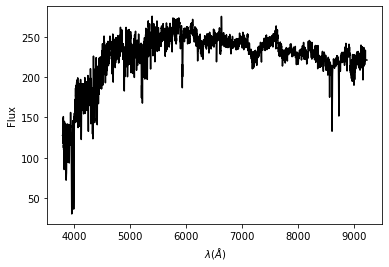

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plate = 1615 # plate number of the spectrum
mjd = 53166 # modified Julian date
fiber = 513 # fiber ID number on a given plate

data = fetch_sdss_spectrum(plate , mjd , fiber)

ax = plt.axes()
ax.plot(data. wavelength(), data.spectrum ,'-k')
ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

print("SDSS spectrum")

We can 'tools' in determining the plate, mjd, and fiber numbers of spectra in a basic query

In [4]:
target = tools .TARGET_GALAXY
plt , mjd , fib = tools.query_plate_mjd_fiber(5, primtarget =target)

print("Plate : ",plt)
print("Julian Data : ",mjd)
print("Fiber ID : ",fib)

Plate :  [1732 1732 1732 1732 1732]
Julian Data :  [53501 53501 53501 53501 53501]
Fiber ID :  [156 157 158 161 162]


### Galaxies with SDSS Spectroscopic Data

The r vs. u−r color–magnitude diagram galaxies from the SDSS.


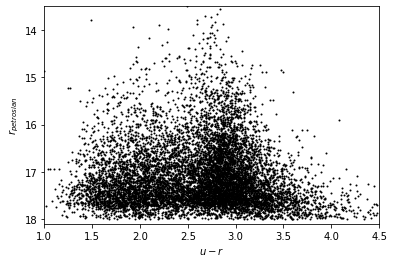

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

data = fetch_sdss_specgals()

data = data[:10000] # truncate data
u = data['modelMag_u']
r = data['modelMag_r']
rPetro = data['petroMag_r']

ax = plt.axes()
ax.scatter(u-r, rPetro , s=4, lw=0, c='k')
ax.set_xlim(1, 4.5)
ax.set_ylim (18.1, 13.5)
ax.set_xlabel('$u - r$')
ax.set_ylabel('$r_{petrosian}$')

print("The r vs. u−r color–magnitude diagram galaxies from the SDSS.")

### SDSS DR7 Quasar Catalog

The r−i color vs. redshift diagram from the SDSS Data Release 7 Quasar Catalog.


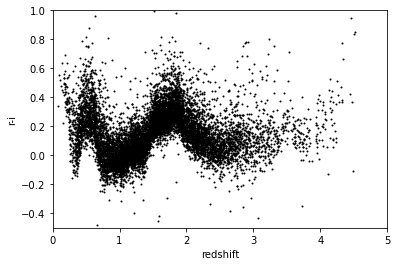

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

data = fetch_dr7_quasar()

data = data[:10000]
r = data['mag_r']
i = data['mag_i']
z = data ['redshift']

ax = plt.axes()
ax.scatter(z, r - i, s=4, c='black',linewidth=0)
ax.set_xlim(0, 5)
ax.set_ylim(-0.5, 1.0)
ax.set_xlabel('redshift')
ax.set_ylabel('r-i')

print("The r−i color vs. redshift diagram from the SDSS Data Release 7 Quasar Catalog.")

### SEGUE Stellar Parameters Pipeline Parameters

The surface gravity vs. effective temperature plot from the catalog of stars with SDSS spectra.


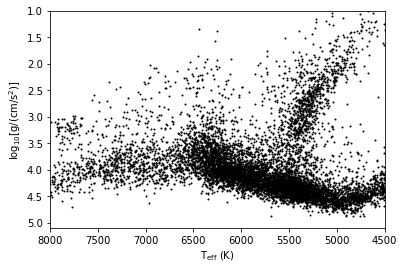

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

data = fetch_sdss_sspp()

data = data[:10000]
rpsf = data['rpsf'] # make some reasonable cuts
data = data[(rpsf > 15) & (rpsf < 19)]
logg = data['logg']
Teff = data['Teff']

ax = plt.axes()
ax.scatter(Teff , logg , s=4, lw=0, c='k')
ax.set_xlim (8000, 4500)
ax.set_ylim (5.1, 1)
ax.set_xlabel(r'$\mathrm{T_{eff}\ (K)}$')
ax.set_ylabel (r'$\mathrm{ log_ {10}[g /(cm/s^2)]}$')

print("The surface gravity vs. effective temperature plot from the catalog of stars with SDSS spectra.")

### SDSS Standard Star Catalog from Stripe 82

The g−r vs. r−i color–color diagram of the entiries in the Stripe 82 Standard Star Catalog.


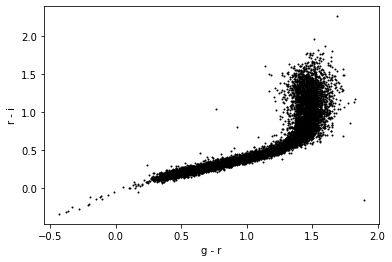

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

data = fetch_sdss_S82standards()

data = data[:10000]
g = data['mmu_g'] # g-band mean magnitude
r = data['mmu_r'] # r-band mean magnitude
i = data['mmu_i'] # i-band mean magnitude

ax = plt.axes()
ax. scatter(g - r, r - i, s=4, c='black',linewidth=0)
ax. set_xlabel('g - r')
ax. set_ylabel('r - i')

print("The g−r vs. r−i color–color diagram of the entiries in the Stripe 82 Standard Star Catalog.")

### SDSS Moving Object Catalog

The orbital semimajor axis vs. the orbital inclination angle diagram from the SDSS Moving Object Catalog


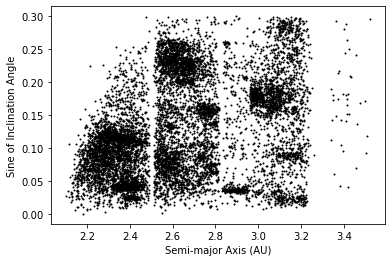

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

data = fetch_moving_objects(Parker2008_cuts=True)

data = data[:10000]
a = data['aprime']
sini = data['sin_iprime']

ax = plt.axes()
ax.scatter(a, sini , s=4, c='black',linewidth=0)
ax.set_xlabel('Semi-major Axis (AU)')
ax.set_ylabel('Sine of Inclination Angle')

print("The orbital semimajor axis vs. the orbital inclination angle diagram from the SDSS Moving Object Catalog")